**Shibu Mohapatra MSC AI**

In [1]:
# Module – 3
# Image Segmentation and Contours
# Blob detection

# necessary libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt

# load image from file
from skimage.io import imread, imshow

# It detects blobs by finding maximas in the matrix of the Determinant of Hessian of the image. 
# The detection speed is independent of the size of blobs as internally the implementation uses box filters instead of convolutions. 

from skimage.feature import blob_dog, blob_log, blob_doh

import warnings 
warnings.filterwarnings('ignore')

In [2]:
# loading dataset

leaves = imread('/content/leaves.jpg')
leaves_mask = imread('/content/leaves_mask.jpg')

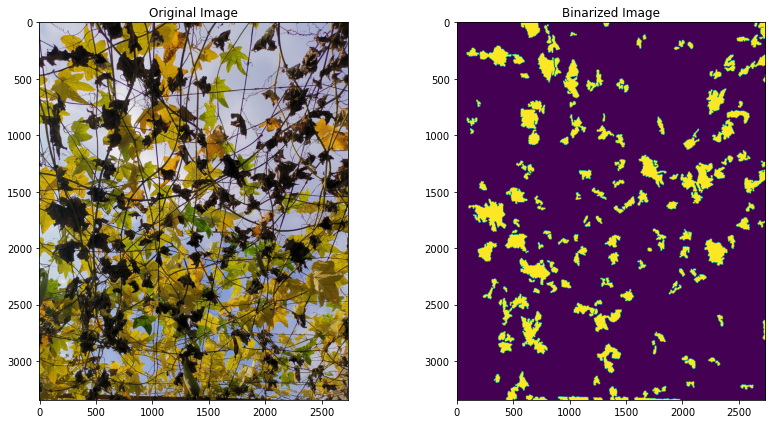

In [3]:
# plotting original image
fig, axis = plt.subplots(1,2, figsize=(12,6))
axis[0].imshow(leaves);
axis[0].set_title('Original Image')

# plotting binary image
axis[1].imshow(leaves_mask)
axis[1].set_title('Binarized Image')
plt.tight_layout()

In [4]:
# Laplacian of Gaussian (LoG)
# it takes the Laplacian of a Gaussian smoothed image
# LoG on binarized image

# min_sigma: blobs in the given grayscale image
# The minimum standard deviation for Gaussian Kernel used to compute Hessian matrix

# Laplacian of Gaussian (LoG) method detected the blobs of dried leaves in the image
# Especially the smaller leaves. 
# we can notice that when the leaves are large, elongated, or irregular shaped, the algorithm tends to splits the object into two or more blobs.

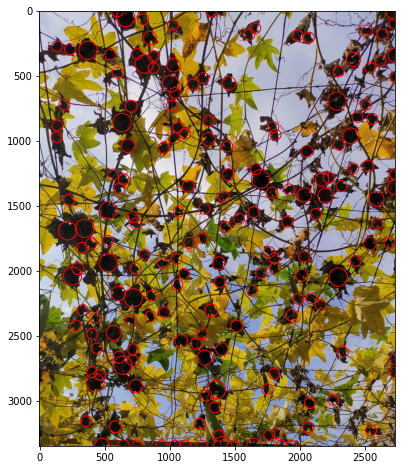

In [5]:
blobs = blob_log(leaves_mask, min_sigma=30)

fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(leaves)

for blob in blobs:
    y, x, area = blob
    ax.add_patch(plt.Circle((x, y), area*np.sqrt(2), 
                 color='r', fill=False))

In [6]:
# Difference of Gaussian (DoG)
# Involves the subtraction of one Gaussian blurred version of an original image from another
# less blurred version of the original

# calculated as the difference between two smoothed versions of an image obtained by applying two Gaussian kernels of 
# different standard deviations (sigma) on that image.

# DoG method improved the blob detection from the LoG. 
# Notice how we can detect large-sized objects using a single larger blob size rather than using multiple smaller blobs. 
# However, the method still cannot consider elongated objects as a single blob.

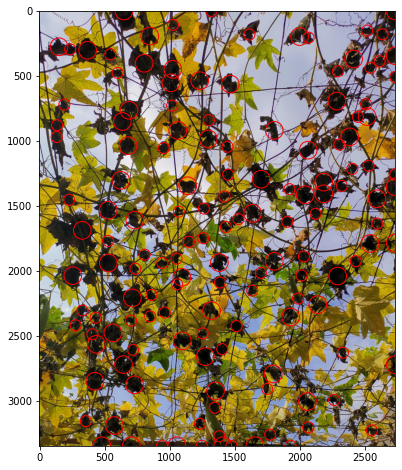

In [7]:
blobs = blob_dog(leaves_mask, min_sigma=30)

fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(leaves)
for blob in blobs:
    y, x, area = blob
    ax.add_patch(plt.Circle((x, y), area*np.sqrt(2), 
                 color='r', fill=False))

In [8]:
# Determinant of Hessian (DoH)
# It detects blobs by finding maximas in the matrix of the Determinant of Hessian of the image. 
# The detection speed is independent of the size of blobs as internally the implementation uses box filters instead of convolutions. 
# Bright on dark as well as dark on bright blobs are detected.

# DoH did a poor job in detecting blobs in this specific application. 
# However, by inspecting the blobs detected by the method, we can see that this method identifies the object’s edges as the blob rather than the body of the object. 
# This can be particularly useful in other applications wherein detecting the edges of the object is essential.

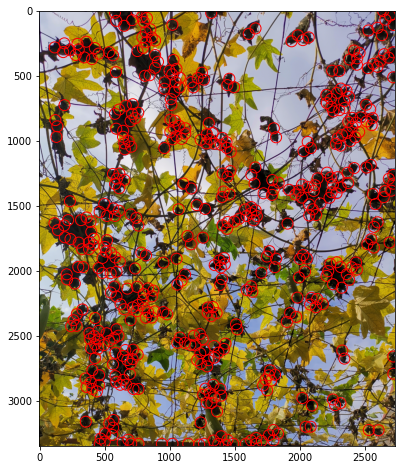

In [9]:
blobs = blob_doh(leaves_mask, min_sigma=30)

fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(leaves)
for blob in blobs:
    y, x, area = blob
    ax.add_patch(plt.Circle((x, y), area*np.sqrt(2), 
                 color='r', fill=False))